# Yelp Review

In [2]:
import pandas as pd
import tqdm
from tqdm import tqdm
import regex as re 
import spacy
nlp = spacy.load("en_core_web_lg")

### Overview
My goal with this Machine Learning Model is to help Yelp or a Business Owner automactically rate a reviewer's review. I used the 'text' columns which represents the review

## Data Exploration

In [3]:
reviews_df = pd.read_csv('data/review.csv', engine='python', error_bad_lines=False)
business_df = pd.read_csv('data/business.csv', engine='python', error_bad_lines=False)

In [4]:
reviews_df.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,Q1sbwvVQXV2734tPgoKj4Q,hG7b0MtEbXx5QzbzE6C_VA,ujmEBvifdJM6h6RLv4wQIg,1.0,6.0,1.0,0.0,Total bill for this horrible service? Over $8G...,2013-05-07 04:34:36
1,GJXCdrto3ASJOqKeVWPi6Q,yXQM5uF2jS6es16SJzNHfg,NZnhc2sEQy3RmzKTZnqtwQ,5.0,0.0,0.0,0.0,I *adore* Travis at the Hard Rock's new Kelly ...,2017-01-14 21:30:33
2,2TzJjDVDEuAW6MR5Vuc1ug,n6-Gk65cPZL6Uz8qRm3NYw,WTqjgwHlXbSFevF32_DJVw,5.0,3.0,0.0,0.0,I have to say that this office really has it t...,2016-11-09 20:09:03
3,yi0R0Ugj_xUx_Nek0-_Qig,dacAIZ6fTM6mqwW5uxkskg,ikCg8xy5JIg_NGPx-MSIDA,5.0,0.0,0.0,0.0,Went in for a lunch. Steak sandwich was delici...,2018-01-09 20:56:38
4,11a8sVPMUFtaC7_ABRkmtw,ssoyf2_x0EQMed6fgHeMyQ,b1b1eb3uo-w561D0ZfCEiQ,1.0,7.0,0.0,0.0,Today was my second out of three sessions I ha...,2018-01-30 23:07:38


In [5]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
business_df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories,hours,attributes.GoodForKids,attributes.RestaurantsReservations,attributes.GoodForMeal,attributes.BusinessParking,attributes.Caters,attributes.NoiseLevel,attributes.RestaurantsTableService,attributes.RestaurantsTakeOut,attributes.RestaurantsPriceRange2,attributes.OutdoorSeating,attributes.BikeParking,attributes.Ambience,attributes.HasTV,attributes.WiFi,attributes.Alcohol,attributes.RestaurantsAttire,attributes.RestaurantsGoodForGroups,attributes.RestaurantsDelivery,hours.Monday,hours.Tuesday,hours.Wednesday,hours.Thursday,hours.Friday,hours.Saturday,hours.Sunday,attributes.BusinessAcceptsCreditCards,attributes,attributes.BusinessAcceptsBitcoin,attributes.ByAppointmentOnly,attributes.AcceptsInsurance,attributes.Music,attributes.GoodForDancing,attributes.CoatCheck,attributes.HappyHour,attributes.BestNights,attributes.WheelchairAccessible,attributes.DogsAllowed,attributes.BYOBCorkage,attributes.DriveThru,attributes.Smoking,attributes.AgesAllowed,attributes.HairSpecializesIn,attributes.Corkage,attributes.BYOB,attributes.DietaryRestrictions,attributes.Open24Hours,attributes.RestaurantsCounterService
0,1SWheh84yJXfytovILXOAQ,Arizona Biltmore Golf Club,2818 E Camino Acequia Drive,Phoenix,AZ,85016,33.522143,-112.018481,3.0,5,0,"Golf, Active Life",NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,QXAEGFB4oINsVuTFxEYKFQ,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,L5R 3E7,43.605499,-79.652289,2.5,128,1,"Specialty Food, Restaurants, Dim Sum, Imported...",NaN,True,True,"{'dessert': False, 'latenight': False, 'lunch'...","{'garage': False, 'street': False, 'validated'...",True,u'loud',True,True,2,False,False,"{'romantic': False, 'intimate': False, 'classy...",False,u'no',u'full_bar',u'casual',True,False,9:0-0:0,9:0-0:0,9:0-0:0,9:0-0:0,9:0-1:0,9:0-1:0,9:0-0:0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,gnKjwL_1w79qoiV3IC_xQQ,Musashi Japanese Restaurant,"10110 Johnston Rd, Ste 15",Charlotte,NC,28210,35.092564,-80.859132,4.0,170,1,"Sushi Bars, Restaurants, Japanese",NaN,True,True,"{'dessert': False, 'latenight': False, 'lunch'...","{'garage': False, 'street': False, 'validated'...",False,u'average',True,True,2,False,True,"{'romantic': False, 'intimate': False, 'touris...",True,u'no',u'beer_and_wine','casual',True,False,17:30-21:30,NaN,17:30-21:30,17:30-21:30,17:30-22:0,17:30-22:0,17:30-21:0,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,xvX2CttrVhyG2z1dFg_0xw,Farmers Insurance - Paul Lorenz,"15655 W Roosevelt St, Ste 237",Goodyear,AZ,85338,33.455613,-112.395596,5.0,3,1,"Insurance, Financial Services",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8:0-17:0,8:0-17:0,8:0-17:0,8:0-17:0,8:0-17:0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,HhyxOkGAM07SRYtlQ4wMFQ,Queen City Plumbing,"4209 Stuart Andrew Blvd, Ste F",Charlotte,NC,28217,35.190012,-80.887223,4.0,4,1,"Plumbing, Shopping, Local Services, Home Servi...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7:0-23:0,7:0-23:0,7:0-23:0,7:0-23:0,7:0-23:0,7:0-23:0,7:0-23:0,True,NaN,False,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
reviews_df.shape

(6685902, 9)

In [7]:
business_df['state'].value_counts()

AZ     56686
NV     36312
ON     33412
NC     14720
OH     14697
PA     11216
QC      9219
AB      8012
WI      5154
IL      1932
SC      1162
NY        22
CA        19
TX         6
XGM        4
FL         4
WA         3
CT         3
AL         3
XWY        2
VT         2
VA         2
GA         2
NE         2
AK         2
DUR        1
AR         1
NM         1
DOW        1
UT         1
XGL        1
BC         1
BAS        1
CON        1
NJ         1
TN         1
Name: state, dtype: int64

In [8]:
reviews_df_copy = reviews_df.drop(columns = {'review_id', 'date', 'useful', 'funny', 'cool'})
business_df_copy = business_df.drop(columns = {'name', 'address', 'postal_code', 'latitude', 'longitude', 'is_open', 'city', 'review_count','hours','attributes.GoodForKids', 'attributes.RestaurantsReservations', 'attributes.GoodForMeal', 'attributes.BusinessParking', 'attributes.Caters', 'attributes.NoiseLevel', 'attributes.RestaurantsTableService', 'attributes.RestaurantsTakeOut', 'attributes.RestaurantsPriceRange2', 'attributes.OutdoorSeating','attributes.BikeParking', 'attributes.Ambience', 'attributes.HasTV', 'attributes.WiFi', 'attributes.Alcohol', 'attributes.RestaurantsAttire', 'attributes.RestaurantsGoodForGroups', 'attributes.RestaurantsDelivery', 'hours.Monday', 'hours.Tuesday', 'hours.Wednesday', 'hours.Thursday', 'hours.Friday', 'hours.Saturday', 'hours.Sunday','attributes.BusinessAcceptsCreditCards','attributes','attributes.BusinessAcceptsBitcoin','attributes.ByAppointmentOnly','attributes.AcceptsInsurance','attributes.Music','attributes.GoodForDancing','attributes.CoatCheck','attributes.HappyHour','attributes.BestNights','attributes.WheelchairAccessible','attributes.DogsAllowed','attributes.BYOBCorkage','attributes.DriveThru','attributes.Smoking','attributes.AgesAllowed','attributes.HairSpecializesIn','attributes.Corkage','attributes.BYOB','attributes.DietaryRestrictions','attributes.Open24Hours','attributes.RestaurantsCounterService'})
business_df_copy = business_df_copy.rename(columns={'stars' : 'rating'})

In [9]:
''' Merging the DataFrames '''
reviews_df_merged = pd.merge(reviews_df_copy, business_df_copy, how='inner')

In [10]:
print(reviews_df_merged.shape)
reviews_df_merged.head()

(6685900, 7)


,user_id,business_id,stars,text,state,rating,categories
0,hG7b0MtEbXx5QzbzE6C_VA,ujmEBvifdJM6h6RLv4wQIg,1.0,Total bill for this horrible service? Over $8G...,NV,2.5,"Fitness & Instruction, Doctors, Health & Medic..."
1,RBXSJA372ilErzNwz0jXvQ,ujmEBvifdJM6h6RLv4wQIg,4.0,My family has used this ER four times in the p...,NV,2.5,"Fitness & Instruction, Doctors, Health & Medic..."
2,x3brMMbJrAW9PwW5A6YL5w,ujmEBvifdJM6h6RLv4wQIg,1.0,I have never been more disappointed by the car...,NV,2.5,"Fitness & Instruction, Doctors, Health & Medic..."
3,Skzdl0sWhW88525a1vr59g,ujmEBvifdJM6h6RLv4wQIg,1.0,"Went in for a broken finger, was asked if I wa...",NV,2.5,"Fitness & Instruction, Doctors, Health & Medic..."
4,3Y25VDfnQVcuc33T-U3Z6A,ujmEBvifdJM6h6RLv4wQIg,5.0,My mother was at Mountain View for nearly two ...,NV,2.5,"Fitness & Instruction, Doctors, Health & Medic..."


In [11]:
reviews_df_merged.to_csv('data/all_categories.csv', index=False)

### Filter the Dataframe on Ontario and Restaurant and Chinese

In [12]:
reviews_df_merged = reviews_df_merged[reviews_df_merged['state']=='ON']
reviews_df_merged.shape

(784461, 7)

In [13]:
reviews_df_merged.isnull().sum()

user_id          0
business_id      0
stars            0
text             0
state            0
rating           0
categories     326
dtype: int64

In [14]:
reviews_df_merged = reviews_df_merged.dropna()
reviews_df_merged.shape

(784135, 7)

In [15]:
categories = ['Restaurant', 'Restaurants']
reviews_df_merged = reviews_df_merged[reviews_df_merged['categories'].str.contains('|'.join(categories))]
reviews_df_merged.shape

(574253, 7)

In [16]:
categories = ['Chinese']
reviews_df_merged = reviews_df_merged[reviews_df_merged['categories'].str.contains('|'.join(categories))]
reviews_df_merged.shape

(65503, 7)

In [17]:
reviews_df_merged = reviews_df_merged.reset_index(drop=True)
reviews_df_merged.head()

,user_id,business_id,stars,text,state,rating,categories
0,jlu4CztcSxrKx56ba1a5AQ,3fw2X5bZYeW9xCz_zGhOHg,3.0,Tracy dessert had a big name in Hong Kong and ...,ON,3.5,"Food, Chinese, Restaurants, Desserts"
1,nkSf1NKWFGiAyrnCa-A5UA,3fw2X5bZYeW9xCz_zGhOHg,3.0,The squid balls were AMAZING. Crispy exterior ...,ON,3.5,"Food, Chinese, Restaurants, Desserts"
2,jG7130OQWiftvHhtyabsog,3fw2X5bZYeW9xCz_zGhOHg,4.0,"Must Try: Mango Sago with Pommels, Shaved Ice ...",ON,3.5,"Food, Chinese, Restaurants, Desserts"
3,wdCwBv_TA_Y-IjUZv2HWWQ,3fw2X5bZYeW9xCz_zGhOHg,1.0,We came on a Friday and the store said that th...,ON,3.5,"Food, Chinese, Restaurants, Desserts"
4,kxz6Q2AERQeo9x6nnbHZNg,3fw2X5bZYeW9xCz_zGhOHg,3.0,I think this is a cool little hang out place f...,ON,3.5,"Food, Chinese, Restaurants, Desserts"


In [20]:
reviews_df_merged.to_csv('data/on_restaurant_chinese.csv', index=False)

In [21]:
reviews_df_merged['categories'].value_counts()

Chinese, Restaurants                                                                    8691
Restaurants, Chinese                                                                    6846
Restaurants, Dim Sum, Chinese                                                           1346
Ramen, Soup, Korean, Japanese, Asian Fusion, American (New), Chinese, Restaurants        930
Dim Sum, Restaurants, Chinese                                                            778
                                                                                        ... 
Dim Sum, Restaurants, Chinese, Seafood                                                     3
Ethnic Food, Imported Food, Restaurants, Chinese, Asian Fusion, Food, Specialty Food       3
Chinese, Restaurants, Asian Fusion, Fast Food                                              3
Chinese, Ethnic Food, Specialty Food, Food, Restaurants                                    3
Restaurants, Noodles, Chinese, Barbeque                               

In [22]:
reviews_df_merged['categories'].nunique()

792

In [23]:
reviews_df_merged['stars'].value_counts()

4.0    22020
3.0    14704
5.0    13262
1.0     8035
2.0     7482
Name: stars, dtype: int64

In [24]:
reviews_df_merged['rating'].value_counts()

3.5    26271
3.0    19818
4.0    12468
2.5     4533
4.5     1206
2.0      962
1.5      146
1.0       50
5.0       49
Name: rating, dtype: int64

<AxesSubplot:>

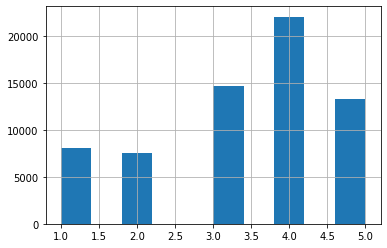

In [25]:
reviews_df_merged['stars'].hist()

<AxesSubplot:>

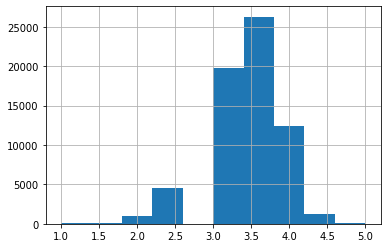

In [26]:
reviews_df_merged['rating'].hist()

### Create Star Rating Categories

- <4 Bad
- =4 Good
- =5 Excellent

In [27]:
star_categories = []

for star in reviews_df_merged['stars']:
    if star == 5.0:
        star_categories.append('Excellent')
    elif star == 4.0:
        star_categories.append('Good')
    elif star < 4.0:
        star_categories.append('Bad')
    else:
        star_categories.append('NA')
        
reviews_df_merged['star_categories'] = star_categories
reviews_df_merged.head()

,user_id,business_id,stars,text,state,rating,categories,star_categories
0,jlu4CztcSxrKx56ba1a5AQ,3fw2X5bZYeW9xCz_zGhOHg,3.0,Tracy dessert had a big name in Hong Kong and ...,ON,3.5,"Food, Chinese, Restaurants, Desserts",Bad
1,nkSf1NKWFGiAyrnCa-A5UA,3fw2X5bZYeW9xCz_zGhOHg,3.0,The squid balls were AMAZING. Crispy exterior ...,ON,3.5,"Food, Chinese, Restaurants, Desserts",Bad
2,jG7130OQWiftvHhtyabsog,3fw2X5bZYeW9xCz_zGhOHg,4.0,"Must Try: Mango Sago with Pommels, Shaved Ice ...",ON,3.5,"Food, Chinese, Restaurants, Desserts",Good
3,wdCwBv_TA_Y-IjUZv2HWWQ,3fw2X5bZYeW9xCz_zGhOHg,1.0,We came on a Friday and the store said that th...,ON,3.5,"Food, Chinese, Restaurants, Desserts",Bad
4,kxz6Q2AERQeo9x6nnbHZNg,3fw2X5bZYeW9xCz_zGhOHg,3.0,I think this is a cool little hang out place f...,ON,3.5,"Food, Chinese, Restaurants, Desserts",Bad


- <4 Bad
- =>4 Good

In [53]:
star_categories = []

for star in reviews_df_merged['stars']:
    if star >=4.0:
        star_categories.append('Good')
    elif star < 4.0:
        star_categories.append('Bad')
    else:
        star_categories.append('NA')
        
reviews_df_merged['star_categories'] = star_categories
reviews_df_merged.head()

,user_id,business_id,stars,text,state,rating,categories,star_categories
0,jlu4CztcSxrKx56ba1a5AQ,3fw2X5bZYeW9xCz_zGhOHg,3.0,Tracy dessert had a big name in Hong Kong and ...,ON,3.5,"Food, Chinese, Restaurants, Desserts",Bad
1,nkSf1NKWFGiAyrnCa-A5UA,3fw2X5bZYeW9xCz_zGhOHg,3.0,The squid balls were AMAZING. Crispy exterior ...,ON,3.5,"Food, Chinese, Restaurants, Desserts",Bad
2,jG7130OQWiftvHhtyabsog,3fw2X5bZYeW9xCz_zGhOHg,4.0,"Must Try: Mango Sago with Pommels, Shaved Ice ...",ON,3.5,"Food, Chinese, Restaurants, Desserts",Good
3,wdCwBv_TA_Y-IjUZv2HWWQ,3fw2X5bZYeW9xCz_zGhOHg,1.0,We came on a Friday and the store said that th...,ON,3.5,"Food, Chinese, Restaurants, Desserts",Bad
4,kxz6Q2AERQeo9x6nnbHZNg,3fw2X5bZYeW9xCz_zGhOHg,3.0,I think this is a cool little hang out place f...,ON,3.5,"Food, Chinese, Restaurants, Desserts",Bad


<AxesSubplot:>

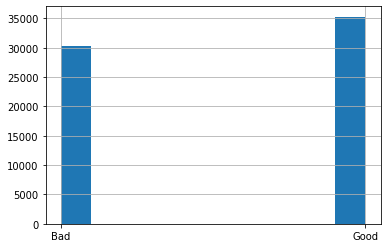

In [54]:
reviews_df_merged['star_categories'].hist()

In [55]:
reviews_df_merged['star_categories'].value_counts()

Good    35282
Bad     30221
Name: star_categories, dtype: int64

### Tokenize, Remove Stop words, and Punct

In [56]:
df = reviews_df_merged.copy()
df.head()

,user_id,business_id,stars,text,state,rating,categories,star_categories
0,jlu4CztcSxrKx56ba1a5AQ,3fw2X5bZYeW9xCz_zGhOHg,3.0,Tracy dessert had a big name in Hong Kong and ...,ON,3.5,"Food, Chinese, Restaurants, Desserts",Bad
1,nkSf1NKWFGiAyrnCa-A5UA,3fw2X5bZYeW9xCz_zGhOHg,3.0,The squid balls were AMAZING. Crispy exterior ...,ON,3.5,"Food, Chinese, Restaurants, Desserts",Bad
2,jG7130OQWiftvHhtyabsog,3fw2X5bZYeW9xCz_zGhOHg,4.0,"Must Try: Mango Sago with Pommels, Shaved Ice ...",ON,3.5,"Food, Chinese, Restaurants, Desserts",Good
3,wdCwBv_TA_Y-IjUZv2HWWQ,3fw2X5bZYeW9xCz_zGhOHg,1.0,We came on a Friday and the store said that th...,ON,3.5,"Food, Chinese, Restaurants, Desserts",Bad
4,kxz6Q2AERQeo9x6nnbHZNg,3fw2X5bZYeW9xCz_zGhOHg,3.0,I think this is a cool little hang out place f...,ON,3.5,"Food, Chinese, Restaurants, Desserts",Bad


<AxesSubplot:>

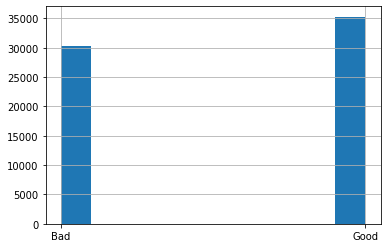

In [57]:
df['star_categories'].hist()

In [58]:
def token_clean(doc_list):
    #Extract tokens from reviews using Spacy
    # nlp.Defaults.stop_words |= {"my_new_stopword1","my_new_stopword2",}

    other_words = []

    tokens = []

    for document in tqdm(doc_list):
        doc = re.sub("[^a-zA-Z]+"," ",str(document))
        doc = doc.lower().strip()
        doc = nlp(doc)
        doc = [token.lemma_ for token in doc if (token.is_stop != True) and (token.is_punct != True) and (str(token) not in other_words) and (str(token).isdigit() != True) and (len(str(token)) >1)]
        tokens.append(doc)
        
    return tokens

In [59]:
df['tokens'] = token_clean(df['text'])

100%|██████████| 65503/65503 [49:55<00:00, 21.87it/s]  


In [61]:
df.to_csv('data/on_resto_chinese_tokens.csv', index=False)

In [3]:
df = pd.read_csv('data/on_resto_chinese_tokens.csv')
df.head()

,user_id,business_id,stars,text,state,rating,categories,star_categories,tokens
0,jlu4CztcSxrKx56ba1a5AQ,3fw2X5bZYeW9xCz_zGhOHg,3.0,Tracy dessert had a big name in Hong Kong and ...,ON,3.5,"Food, Chinese, Restaurants, Desserts",Bad,"['tracy', 'dessert', 'big', 'hong', 'kong', 'm..."
1,nkSf1NKWFGiAyrnCa-A5UA,3fw2X5bZYeW9xCz_zGhOHg,3.0,The squid balls were AMAZING. Crispy exterior ...,ON,3.5,"Food, Chinese, Restaurants, Desserts",Bad,"['squid', 'ball', 'amazing', 'crispy', 'exteri..."
2,jG7130OQWiftvHhtyabsog,3fw2X5bZYeW9xCz_zGhOHg,4.0,"Must Try: Mango Sago with Pommels, Shaved Ice ...",ON,3.5,"Food, Chinese, Restaurants, Desserts",Good,"['try', 'mango', 'sago', 'pommel', 'shave', 'i..."
3,wdCwBv_TA_Y-IjUZv2HWWQ,3fw2X5bZYeW9xCz_zGhOHg,1.0,We came on a Friday and the store said that th...,ON,3.5,"Food, Chinese, Restaurants, Desserts",Bad,"['come', 'friday', 'store', 'say', 'open', 'pm..."
4,kxz6Q2AERQeo9x6nnbHZNg,3fw2X5bZYeW9xCz_zGhOHg,3.0,I think this is a cool little hang out place f...,ON,3.5,"Food, Chinese, Restaurants, Desserts",Bad,"['think', 'cool', 'little', 'hang', 'place', '..."


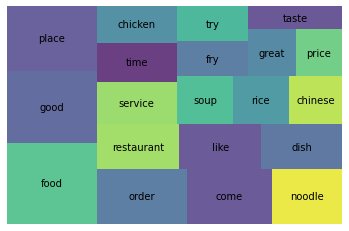

In [62]:
# Object from Base Python
from collections import Counter

# The object `Counter` takes an iterable, but you can instaniate an empty one and update it. 
word_counts = Counter()

def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')
    
wc = count(df['tokens'])

import squarify
import matplotlib.pyplot as plt
import seaborn as sns

wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

### Find Baseline

In [5]:
df['star_categories'].value_counts(normalize=True).sort_index()

Bad     0.461368
Good    0.538632
Name: star_categories, dtype: float64

## Check TFIDF features

In [64]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(ngram_range=(1,2),
                      max_df=0.97,
                      min_df=2)

description = df['tokens'].astype(str)

dtm = tfidf.fit_transform(description)

dtm = pd.DataFrame(dtm.todense(), columns=tfidf.get_feature_names())

dtm.head()

,aa,aaa,aaa beef,aaa prime,aaa sirloin,aaa slice,aaaaand,aah,ab,aback,aback say,abalone,abalone abalone,abalone actually,abalone appetizer,abalone beef,abalone bird,abalone broth,abalone chicken,abalone clam,abalone congee,abalone cook,abalone crab,abalone delicious,abalone dish,abalone dry,abalone duck,abalone eel,abalone expensive,abalone find,abalone fresh,abalone fry,abalone geoduck,abalone giant,abalone good,abalone green,abalone hard,abalone lobster,abalone mushroom,abalone oyster,abalone pass,abalone pastry,abalone puff,abalone rice,abalone salty,abalone sauce,abalone scallop,abalone sea,abalone seafood,abalone shark,abalone shrimp,abalone small,abalone soup,abalone steam,abalone tender,abalone ve,abalone vegetable,abalone veggie,abandon,abandon congee,abandon outside,abandon table,abbas,abbreviate,abc,abd,aber,aberdeen,aberdeen delicatessen,aberration,abide,ability,ability choose,ability customize,ability eat,ability handle,ability order,abit,abit expensive,abit pricey,abit rude,abit salty,abit small,able,able accommodate,able accomodate,able actually,able add,able adjust,able advantage,able answer,able ask,able attend,able attention,able avoid,able beat,able bend,able better,able big,able bill,able bite,able book,able booth,able bring,able buy,able carry,able catch,able cater,able change,able check,able chew,able chicken,able choose,able come,able communicate,able compare,able confirm,able connect,able consume,able control,able converse,able cook,able create,able custom,able customize,able deal,able decent,able delicious,able deliver,able describe,able dessert,able determine,able dim,able dine,able dish,able distinguish,able don,able drink,able easily,able eat,able end,able enjoy,able experience,able explain,able feed,able figure,able fill,able find,able finish,able fit,able fix,able flag,able food,able fresh,able good,able grab,able guess,able handle,able hear,able help,able high,able hit,able hold,able home,able hour,able identify,able item,able learn,able leave,able leftover,able like,able live,able locate,able lock,able look,able lot,able maintain,able manage,able meal,able meet,able minute,able mix,able money,able nice,able offer,able option,able order,able overall,able pace,able pack,able patio,able pay,able people,able pick,able picture,able place,able play,able point,able pound,able prepare,able private,able produce,able provide,able pull,able purchase,able push,able quickly,able reach,able read,able receive,able recommend,able refill,able request,able reservation,able reserve,able restaurant,able return,able review,able right,able roll,able run,able sample,able satisfy,able sauce,able save,able score,able seat,able secure,able select,able sell,able serve,able service,able shape,able share,able similar,able sit,able small,able smell,able snag,able soup,able speak,able special,able spend,able spice,able spicy,able split,able spot,able squeeze,able stay,able stop,...,yummy toast,yummy today,yummy tofu,yummy topping,yummy traditional,yummy treat,yummy try,yummy tummy,yummy turnip,yummy typical,yummy unique,yummy unlike,yummy usually,yummy variety,yummy ve,yummy veg,yummy vegetable,yummy vegetarian,yummy veggie,yummy verdict,yummy vietnamese,yummy wait,yummy want,yummy warm,yummy wasn,yummy way,yummy well,yummy will,yummy wing,yummy wish,yummy wok,yummy wonton,yummy wouldn,yummy wrong,yummy yes,yummy yummy,yummy zone,yumsville,yumyum,yumyum sauce,yumz,yun,yun fat,yun nan,yun noodle,yunan,yunan noodle,yunan rice,yunan style,yung,yung chow,yung kee,yung rice,yung sing,yunnan,yunnan base,yunnan china,yunnan classic,yunnan come,yunnan cross,yunnan cuisine,yunnan fish,yunnan food,yunnan fry,yunnan noodle,yunnan people,yunnan province,yunnan restaurant,yunnan rice,yunnan soup,yunnan style,yunnan think,yunnan vermicelli,yunshang,yup,yup get,yup love,yup new,yup service,yup star,yuppie,yuseul,yuseul jajang,yut,yuuuum,yuzen,yuzen hashimoto,yuzu,yuzu chicken,yuzu ramen,yuzu sauce,yuzu soy,yvonne,yyd,yyz,za,zaa,zag,zagat,zag

## Split Data

In [4]:
from sklearn.model_selection import train_test_split 

df['tokens']= df['tokens'].astype(str)

train, test = train_test_split(df, test_size=0.33, random_state=42)

feature = 'tokens'
target = 'star_categories'

#Train
X_train = train[feature]
y_train = train[target]

# Validation Sets
X_test = test[feature]
y_test = test[target]

In [5]:
df.shape

(65503, 9)

## Random Forest Classifier

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer

In [11]:
vect = TfidfVectorizer(stop_words='english', ngram_range=(1,2))
rfc = RandomForestClassifier()

In [12]:
params = {
    'lsi__vect__min_df':[2,5],
    'lsi__vect__max_df':[.9, .95, 1.0],
    'lsi__vect__ngram_range':[(1,1),(1,2),(1,3)],
    'clf__n_estimators':[300,500,1000]}

In [13]:
# LSI
lsi = Pipeline([('vect', vect)])

# Pipe
pipe = Pipeline([('lsi', lsi), ('clf', rfc)])

In [14]:
# Fit
from sklearn.model_selection import RandomizedSearchCV

grid_search = RandomizedSearchCV(pipe,params, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 100.4min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 154.9min finished


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('lsi',
                                              Pipeline(steps=[('vect',
                                                               TfidfVectorizer(ngram_range=(1,
                                                                                            2),
                                                                               stop_words='english'))])),
                                             ('clf',
                                              RandomForestClassifier())]),
                   n_jobs=-1,
                   param_distributions={'clf__n_estimators': [300, 500, 1000],
                                        'lsi__vect__max_df': [0.9, 0.95, 1.0],
                                        'lsi__vect__min_df': [2, 5],
                                        'lsi__vect__ngram_range': [(1, 1),
                                                                   (1, 2),
                   

In [15]:
grid_search.best_score_

0.8181692280563133

In [16]:
grid_search.best_params_

{'lsi__vect__ngram_range': (1, 2),
 'lsi__vect__min_df': 5,
 'lsi__vect__max_df': 0.95,
 'clf__n_estimators': 1000}

### Evaluation: classfication report & confusion matrix 

In [3]:
pipeline = grid_search.best_estimator_

NameError: name 'grid_search' is not defined

In [18]:
y_pred = pipeline.predict(X_test)

In [19]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         Bad       0.84      0.74      0.79     10062
        Good       0.79      0.88      0.83     11554

    accuracy                           0.81     21616
   macro avg       0.82      0.81      0.81     21616
weighted avg       0.82      0.81      0.81     21616



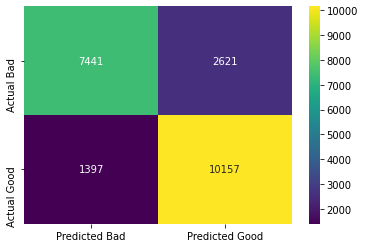

In [20]:
import seaborn as sns
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred):
    labels = unique_labels(y_true)
    columns = [f'Predicted {label}' for label in labels]
    index = [f'Actual {label}' for label in labels]
    table = pd.DataFrame(confusion_matrix(y_true, y_pred), 
                         columns=columns, index=index)
    return sns.heatmap(table, annot=True, fmt='d', cmap='viridis')

plot_confusion_matrix(y_test, y_pred);

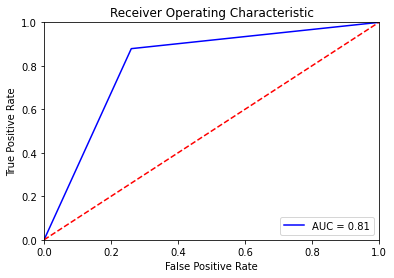

In [24]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification

y_test_encoded = [1 if target == 'Good' else 0 for target in y_test]
y_pred_encoded = [1 if target == 'Good' else 0 for target in y_pred]

probs = pipeline.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test_encoded, y_pred_encoded)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [26]:
df_roc = pd.DataFrame()
df_roc['fpr'] = fpr
df_roc['tpr'] = tpr
df_roc['threshold'] = threshold
df_roc.head(10)

,fpr,tpr,threshold
0,0.000000,0.000000,2
1,0.260485,0.879089,1
2,1.000000,1.000000,0


## Conclusion

A standard TFIDF and RandomForestClassifer (without SVD) had a training accuracy of 81.8% and a testing accuracy of 81%

## Export model

In [22]:
# 1 pickle file is to big for heroku and github
import pickle

filename = 'pipe_01.pkl'
pickle.dump(pipeline, open(filename, 'wb'))

In [2]:
import joblib 

joblib.dump(pipeline, open('pipe_02.pkl', 'wb'))

NameError: name 'pipeline' is not defined